<a href="https://colab.research.google.com/github/ayumawaddawarohma/Project_akhir_5/blob/main/MediaPipe_Pose_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pose Estimation Menggunakan MediaPipe

## Mediapipe

Mediapipe menyediakan model yang dapat melakukan pose estimation pada seluruh tubuh objek. Proses kerja terbagi menjadi 2 tahapan yaitu mendeteksi objek dan menentukan Region of Interestnya, lalu melakukan tracking dan memperkirakan landmarks dalam object tersebut

Untuk lebih jelasnya, dapat dilihat pada Paper berikut [link text](https://arxiv.org/pdf/2006.10204.pdf)

## Landmarks

Berikut adalah daftar landmarks yang akan diprediksi letaknya dari sebuah object. Terdapat 33 landmarks pada berbagai area penting tubuh

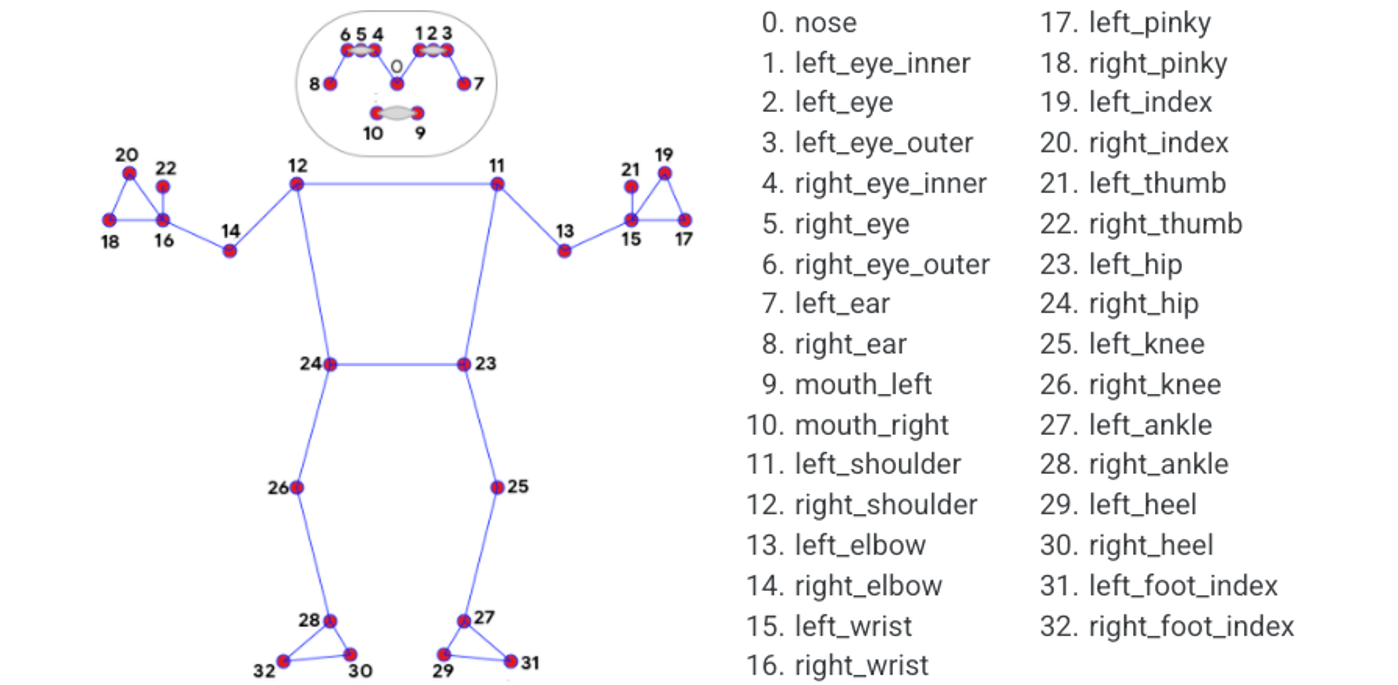

## Download mediapipe

In [1]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.6/33.6 MB 47.3 MB/s eta 0:00:00


In [2]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow
import numpy as np

### Upload File Gambar

Usahakan pilih file gambar dengan tubuh pada gambar terlihat jelas. Sebagai contoh anda dapat menggunakan gambar berikut [contoh gambar](https://drive.google.com/file/d/1Fvd3WvH5ny_JOu0bZX9iBkMYZSPKJq81/view?usp=sharing)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  pose_path = '/content/' + fn

Saving yoi gan.jpg to yoi gan.jpg


## Media Pipe Body Pose Estimation

In [4]:
# memanggil beberapa modul dari library media pipe
# untuk dapat menggambar pose dari tangan yang ada pada citra
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

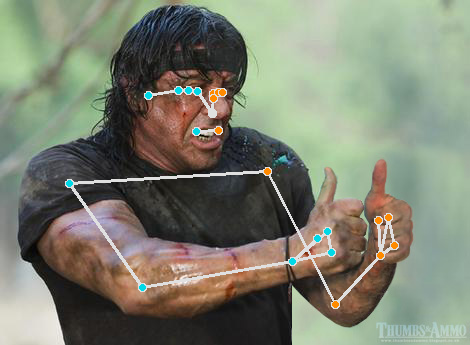

In [5]:
with mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    min_detection_confidence=0.5) as pose:
  img = cv2.imread(pose_path)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  results = pose.process(img_rgb)

  if not results.pose_landmarks:
    print('no hands detected')

  image_height, image_width, _ = img.shape
  annotated_img = img.copy()

  condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
  mp_drawing.draw_landmarks(
        annotated_img,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())

  cv2.imwrite('annotated_image' + '.png', cv2.flip(annotated_img, 1))


  if not results.pose_world_landmarks:
    pass

  cv2_imshow(annotated_img)

## Mediapipe untuk Hand Pose Estimation

Berikut adalah daftar landmarks yang akan diprediksi letaknya dari sebuah object telapak tangan. Terdapat 21 landmarks pada berbagai area penting.

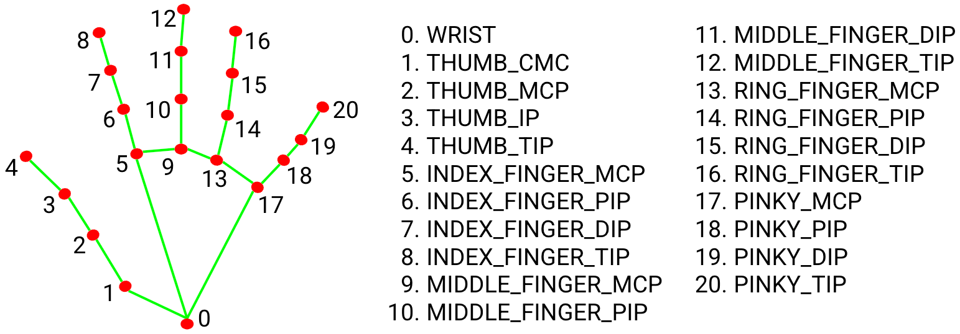

In [6]:
# memanggil beberapa modul dari library media pipe
# untuk dapat menggambar pose dari tangan yang ada pada citra
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

### Upload File Gambar

Usahakan pilih file gambar dengan jari pada gambar terlihat jelas. Sebagai contoh anda dapat menggunakan gambar berikut [contoh gambar](https://drive.google.com/file/d/1Fvd3WvH5ny_JOu0bZX9iBkMYZSPKJq81/view?usp=sharing)

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  hand_path = '/content/' + fn

Saving yoi gan.jpg to yoi gan (1).jpg


### Melakukan Hand Pose Estimation

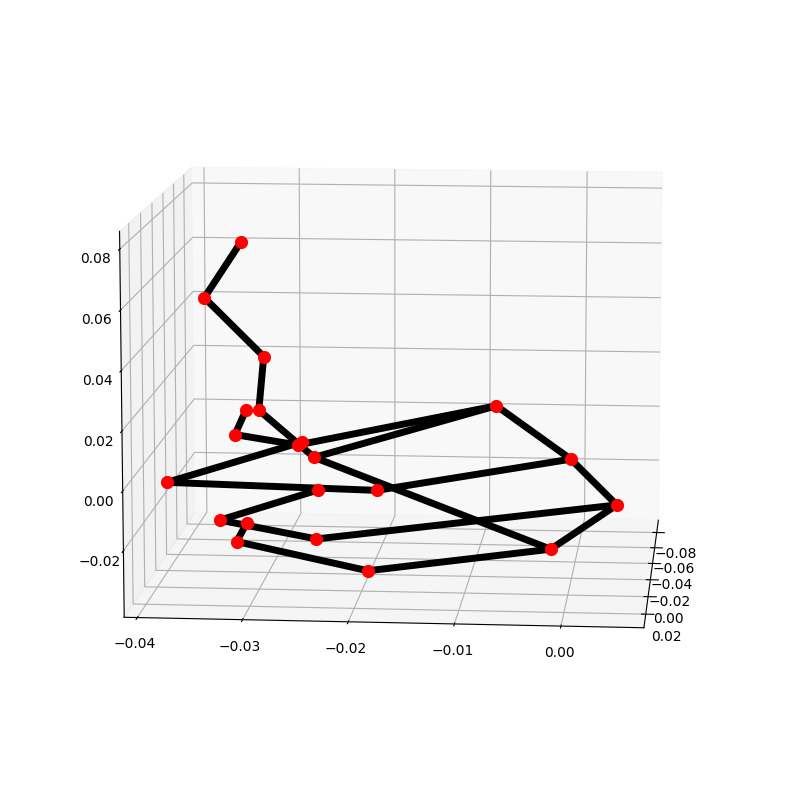

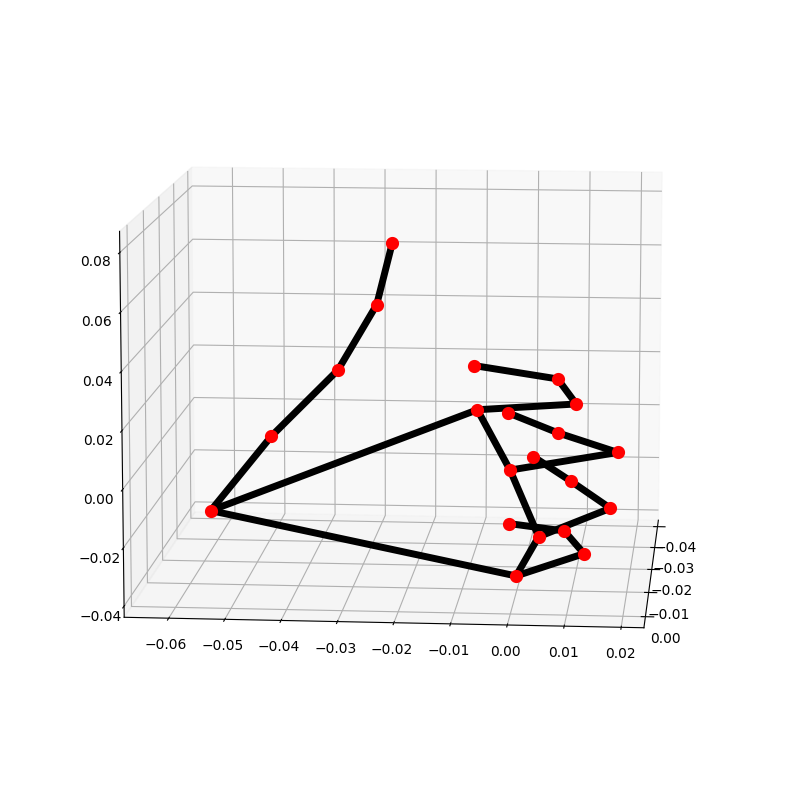

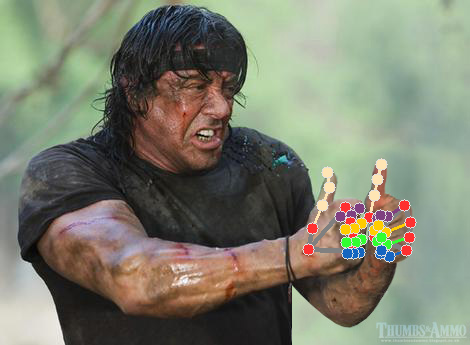

In [8]:
with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5) as hands:

  # membaca file gambar
  img = cv2.imread(hand_path)

  # cv2 akan membuat gambar menjadi BGR, kita harus ubah menjadi RGB
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # hasil dari proses hand pose estimation
  results = hands.process(img_rgb)

  # jika tidak ada tangan akan muncul notifikasi 'no hands detected'
  if not results.multi_hand_landmarks:
    print('no hands detected')

  # mendapatkan ukuran dari gambar input
  image_height, image_width, _ = img.shape

  # mencopy gambar untuk proses pemberian anotasi
  annotated_img = img.copy()


  # memnggambar setiap landmarks pada tiap gambar tangan yang terdeteksi
  for hand_landmarks in results.multi_hand_landmarks:
    mp_drawing.draw_landmarks(
        annotated_img,
        hand_landmarks,
        mp_hands.HAND_CONNECTIONS,
        mp_drawing_styles.get_default_hand_landmarks_style(),
        mp_drawing_styles.get_default_hand_connections_style())

  # menyimpan file hasil pose estimation ke dalam file .png
  cv2.imwrite('annotated_image' + '.png', cv2.flip(annotated_img, 1))
    # Draw hand world landmarks.

  if not results.multi_hand_world_landmarks:
    pass

  # membuat plot atau diagram landmarks
  for hand_world_landmarks in results.multi_hand_world_landmarks:
      mp_drawing.plot_landmarks(hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)

  # menampilkan hasil anotasi
  cv2_imshow(annotated_img)

# Tugas

Setelah kalian mencoba Pose Estimation menggunakan Mediapipe, cobalah mencari ide yang menerapkan sistem pose estimation agar dapat bermanfaat bagi banyak orang!